# 2. 데이터 탐색

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Pseudo-Lab/Tutorial-Book/blob/master/book/chapters/object-detection/Ch2-EDA.ipynb)

In [1]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/57Fzx8oDLCc" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')



이전 장에서 객체 탐지에 대해 전체적으로 간략하게 살펴보았습니다. 이번 장부터는 본격적으로 객체 탐지를 위한 업무를 수행하도록 하겠습니다. 딥러닝 모델 성능 향상에 있어서 가장 중요한 부분은 모델 자체도 중요하지만, 데이터셋입니다. 데이터과학자들은 딥러닝 모델 학습에 있어서 데이터 정제(Data Curation)에 90% 이상 시간을 소비한다고 합니다. 한쪽으로 치우치거나, 잘못된 결과 혹은 왜곡된 학습 결과를 피하기 위해서는 데이터 정제가 필수입니다. 데이터 정제를 수월하게 하기 위해서는 올바른 데이터셋 사용이 중요합니다.

이번 장에서는 객체 탐지 모델 학습을 위해 데이터를 탐색해보고, 기초적인 바운딩 박스 도식화를 해보도록 하겠습니다. 2.1절에서 데이터 다운로드 방법을 안내할 예정이며 2.2절에서는 데이터셋에 저장된 정보를 확인해보겠습니다. 그리고 2.3절에서는 바운딩 박스 시각화를 진행하겠습니다. 데이터셋은 캐글(Kaggle)에서 공유된 [Face Mask Detection](https://www.kaggle.com/andrewmvd/face-mask-detection) 데이터셋을 사용하도록 하겠습니다. 튜토리얼 목적에 따라, 학습 시간이 많이 소요되는 방대한 데이터셋보다는 적절한 크기의 데이터셋을 선택하였습니다.

## 2.1. 데이터셋 다운로드

가장 먼저 학습에 사용할 데이터셋을 내려받도록 하겠습니다. 가짜연구소에서 제공하는 데이터 로더 함수를 활용해 쉽게 데이터를 다운로드 할 수 있습니다. `git clone` 명령어를 활용하여 Tutorial-Book-Utils 저장소를 Colab 환경에 다운로드 하겠습니다.

In [ ]:
!git clone https://github.com/Pseudo-Lab/Tutorial-Book-Utils

Cloning into 'Tutorial-Book-Utils'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 1), reused 2 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


`git clone` 명령어 실행 후, Tutorial-Book-Utils 폴더 내에 `PL_data_loader.py` 파일이 위치한 것을 알 수 있습니다. 해당 파일 내에는 구글 드라이브에 있는 파일을 다운로드 하는 함수가 저장되어 있습니다. `--data` 파라미터에 `FaceMaskDetection`을 입력함으로써 마스크 착용 탐지 모델 구축에 활용할 데이터를 받을 수 있습니다. 

In [ ]:
!python Tutorial-Book-Utils/PL_data_loader.py --data FaceMaskDetection

Face Mask Detection.zip is done!


위와 같이 Face Mask Detection.zip 파일이 다운로드 된 것을 확인할 수 있습니다. 다음으로 리눅스 명령어인 unzip을 활용하여 압축파일을 풀어보도록 하겠습니다. `-q` 옵션을 통해 불필요한 출력물이 나오지 않게 제어 가능합니다. 

In [ ]:
!unzip -q Face\ Mask\ Detection.zip

Colab 경로를 확인하시면 그림 2.2와 같이 "annotations" 폴더와 "images" 폴더가 생성된 것을 확인할 수 있습니다. "annotations" 폴더에는 이미지별 의료용 마스크 위치 좌표가 저장되어 있고, "images" 폴더에는 이미지가 저장되어 있습니다. 

![dataset example](https://github.com/Pseudo-Lab/Tutorial-Book/blob/master/book/pics/ch2img02.PNG?raw=true)

- 그림 2-1 실험을 위한 폴더 경로 

## 2.2. 데이터셋 확인

Face Mask Detection 데이터셋을 살펴보면 "images"와 "annotations" 두 폴더가 있습니다. "images" 폴더에는 이미지 파일이 0부터 852까지 있으며, "annotations" 폴더에는 xml 파일이 0부터 852까지 있습니다.

"annotations" 폴더 안에 있는 xml 파일들은 각각의 이미지 파일의 정보를 가지고 있습니다. 예를 들어, maksssksksss307.xml 파일을 살펴보도록 하겠습니다.

In [ ]:
<annotation>
    <folder>images</folder>
    <filename>maksssksksss307.png</filename>
    <size>
        <width>400</width>
        <height>226</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>mask_weared_incorrect</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>3</xmin>
            <ymin>65</ymin>
            <xmax>96</xmax>
            <ymax>163</ymax>
        </bndbox>
    </object>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>146</xmin>
            <ymin>28</ymin>
            <xmax>249</xmax>
            <ymax>140</ymax>
        </bndbox>
    </object>
    <object>
        <name>without_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>287</xmin>
            <ymin>180</ymin>
            <xmax>343</xmax>
            <ymax>225</ymax>
        </bndbox>
    </object>
</annotation>

파일 내용을 살펴보면, 처음에 폴더명과 파일명이 나오며, 이미지 크기 정보가 포함되어 있는 걸 확인할 수 있습니다. 이제 `object`안 코드를 살펴보면, `mask_weared_incorrect`, `with_mask`, `without_mask` 이렇게 세가지로 나눠지는걸 확인할 수 있습니다. `mask_weared_incorrect`의 경우 마스크를 제대로 쓰지 않은 객체의 정보, `with_mask`는 마스크를 착용하고 있는 객체 위치 정보, `without_mask`은 마스크를 쓰지 않은 객체의 정보를 담고 있습니다. 만약 한 이미지 파일 안에 마스크를 착용한 객체가 2명이라면, `with_mask` 정보를 포함한 `object`가 2개 인것을 볼 수 있을 것입니다. `bndbox`안에는 `xmin`, `ymin`, `xmax`, `ymax`가 순서대로 나오는 걸 볼 수 있습니다. 이는 바운딩 박스 영역을 지정하는 정보입니다.


![dataset example](https://github.com/Pseudo-Lab/Tutorial-Book/blob/master/book/pics/ch2img01.png?raw=true)

- 그림 2-2 maksssksksss307.png 파일 시각화


그림 2-2는 maksssksksss307.xml 파일이 설명하는 maksssksksss307.png 이미지 파일입니다. `object`가 X좌표 가장 왼쪽으로부터 순서대로 `mask_weared_incorrect`, `with_mask`, `without_mask`가 나오듯이, 해당 이미지 파일에서도 마스크를 올바르게 착용하지 않은 객체, 마스크를 착용한 객체, 그리고 마스크를 착용하지 않은 객체가 X 좌표 왼쪽에서부터 차례대로 나오는 걸 확인할 수 있습니다.

## 2.3. 바운딩 박스 도식화

딥러닝 모델 정확도를 높이기 위해 중요한 것은 데이터셋 검증입니다. 지도학습은 레이블링(labeling) 된 데이터로 모델이 학습을 하기 때문에 올바르게 레이블링 된 데이터임을 확인하는 것이 중요합니다. 이번 절에서는 주어진 이미지에 바운딩 박스를 시각화해 올바르게 레이블링이 된 데이터인지 확인해보겠습니다.

In [ ]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from bs4 import BeautifulSoup

바운딩 박스 시각화 코드를 테스트하기 위해 위의 패키지들을 불러옵니다. matplotlib는 시각화의 대표적인 패키지이며, glob 패키지는 파일을 다루는데 널리 쓰이는 패키지입니다. BeautifulSoup은 HTML과 XML 문서 파일을 파싱(Parsing)하는 패키지이며, 웹스크래핑(Web Scraping)에 유용하게 쓰입니다.

In [ ]:
img_list = sorted(glob.glob('images/*'))
annot_list = sorted(glob.glob('annotations/*'))

glob 패키지를 이용해 데이터셋을 불러옵니다. 폴더 경로는 데이터셋이 들어있는 곳으로 지정하셔야 합니다. 추가로 `sorted` 함수를 사용해 `img_list`에 있는 파일의 id 순서와 `annot_list`에 있는 파일의 id 순서가 같도록 해줍니다 

In [ ]:
print(len(img_list))
print(len(annot_list))

853
853


파이썬의 `len` 함수를 이용하여, 각 폴더에 들어있는 파일 갯수를 파악해봅시다.
각각의 폴더에 총 853개의 데이터를 불러왔습니다.

In [ ]:
print(img_list[:10])
print(annot_list[:10])

['images/maksssksksss0.png', 'images/maksssksksss1.png', 'images/maksssksksss10.png', 'images/maksssksksss100.png', 'images/maksssksksss101.png', 'images/maksssksksss102.png', 'images/maksssksksss103.png', 'images/maksssksksss104.png', 'images/maksssksksss105.png', 'images/maksssksksss106.png']
['annotations/maksssksksss0.xml', 'annotations/maksssksksss1.xml', 'annotations/maksssksksss10.xml', 'annotations/maksssksksss100.xml', 'annotations/maksssksksss101.xml', 'annotations/maksssksksss102.xml', 'annotations/maksssksksss103.xml', 'annotations/maksssksksss104.xml', 'annotations/maksssksksss105.xml', 'annotations/maksssksksss106.xml']


이제 각각의 폴더에 들어있는 파일이 제대로 있는지 확인해보도록 합니다. [:10]는 처음부터 총 10개의 파일명을 출력합니다. 여기서 주의할 점은 출력되는 파일이 순서대로 나오는지 확인해야합니다. 순서대로 출력되지 않을 경우, 이미지 파일과 바운딩 박스 파일의 순서가 뒤얽혀 바운딩 박스가 제대로 표기되지 않는 문제가 발생합니다. 위에서 `img_list`와 `annot_list`를 `sorted` 함수를 이용하여 불러왔기 때문에, 파일의 id 순서가 동일한 것을 알 수 있습니다.


이제 바운딩 박스 시각화를 위한 함수를 정의해보도록 하겠습니다.

In [ ]:
def generate_box(obj):
    
    xmin = float(obj.find('xmin').text)
    ymin = float(obj.find('ymin').text)
    xmax = float(obj.find('xmax').text)
    ymax = float(obj.find('ymax').text)
    
    return [xmin, ymin, xmax, ymax]

def generate_label(obj):
    if obj.find('name').text == "with_mask":
        return 1
    elif obj.find('name').text == "mask_weared_incorrect":
        return 2
    return 0

def generate_target(file): 
    with open(file) as f:
        data = f.read()
        soup = BeautifulSoup(data, "html.parser")
        objects = soup.find_all("object")

        num_objs = len(objects)

        boxes = []
        labels = []
        for i in objects:
            boxes.append(generate_box(i))
            labels.append(generate_label(i))
        
        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        
        return target

def plot_image(img_path, annotation):
    
    img = mpimg.imread(img_path)
    
    fig,ax = plt.subplots(1)
    ax.imshow(img)

    
    for idx in range(len(annotation["boxes"])):
        xmin, ymin, xmax, ymax = annotation["boxes"][idx]

        if annotation['labels'][idx] == 0 :
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='r',facecolor='none')
        
        elif annotation['labels'][idx] == 1 :
            
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='g',facecolor='none')
            
        else :
        
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='orange',facecolor='none')

        ax.add_patch(rect)

    plt.show()

위의 코드는 총 4개의 함수를 정의하였습니다. 우선 `generate_box` 함수를 통해 `xmin`, `ymin`, `xmax`, `ymax` 값을 반환하도록 지정합니다. `generate_label` 함수는 마스크 착용 여부를 세단계로 나눠서 0, 1, 2 값을 반환합니다. `with_mask`의 경우 1을 `mask_weared_incorrect`의 경우 2를 나머지 경우의 수인 `without_mask`는 0을 반환합니다. 

`generate_target` 함수는 `generate_box`와 `generate_label`를 각각 호출하여 반환된 값을 딕셔너리에 저장해 반환하는 함수입니다. `html.parser`를 이용해 annotations 파일에 있는 내용들을 불러와 타겟의 바운딩 박스와 라벨을 추출합니다. `plot_image` 함수는 이미지와 바운딩 박스를 함께 시각화 하는 함수입니다. 마스크 착용시 초록색, 마스크를 올바르게 착용 안했을 시 주황색, 마스크를 착용 안했을 시 빨간색 바운딩 박스를 그립니다. 

In [ ]:
img_list.index('images/maksssksksss307.png') 

232

위의 코드는 maksssksksss307.png 파일의 인덱스 값을 찾기 위함입니다. `index` 함수를 이용하여 maksssksksss307.png 파일 위치의 인덱스 값을 확인할 수 있습니다.

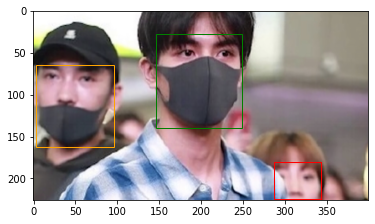

In [ ]:
bbox = generate_target(annot_list[232])
plot_image(img_list[232], bbox)

`plot_image` 함수를 통해 이미지 위에 바운딩 박스를 시각화 합니다. `generate_target` 함수를 활용해 maksssksksss307.png 파일에 해당하는 바운딩 박스 정보를 `bbox`에 저장합니다. 그리고 `plot_image` 함수에 바운딩 박스 정보와 더불어 해당 이미지 파일 정보도 넘겨주어 시각화를 실시합니다. `img_list[]`와 `annot_list[]`안의 숫자는 maksssksksss307.png 파일의 위치를 뜻하므로 같은 숫자가 들어가 있습니다. 

이번 장에서는 데이터셋 탐색을 하여 바운딩 박스를 확인하는 실습을 진행하였습니다. 다음 장에서는 데이터셋을 학습시키기 위한 데이터 전처리 과정에 대해 살펴보도록 하겠습니다.